# E2 285 - Mtech ECE lab (2022)

Contributors: Aditya Gopalan, Abhigyan Dutta, Jaswanth Nischal Dokka, Vaishnav KV, Akkurthi Sree Harsha

# Week 2: Prediction with data

Machine learning is broadly the problem of how to use data to improve performance on a task. 

This module guides you to solve a (linear) prediction task with data. 


# Part 1: Linear prediction in 1 dimension

## Task

Suppose you want to predict the value a variable $y \in \mathbb{R}$ from an (observed) variable $x \in \mathbb{R}$, e.g., predict the height of a (typical) person from the weight of the person. You have data (or observations, or measurements) of the form $(x_1, y_1), \ldots, (x_n, y_n)$ based on which you want to learn to perform this task. 

## Data
Let's first generate a fictitious dataset for us to learn from. We will simulate $n = 100$ data points, where the $x_i$ are sampled uniformly at random from a Gaussian (normal) distribution with mean 10 and standard deviation 5. For each $x_i$, the value $y_i$ is taken to be according to the noisy linear model $y_i = w \, x_i + \eta_i$, with $w = 2$ (the "ground truth") and $\{\eta_i\}_{i=1}^n$ being iid standard normal random variables ("noise" or "unmodeled disturbances"). 



In [ ]:
import numpy as np

np.random.seed(2022) # setting the state of NumPy's random number to be a known value, for reproducibility
data_length = 100
x_mean = 10
x_std = 5
x = np.random.normal(loc=x_mean, scale=x_std, size=data_length) # a vector of size data_length with 
                                                            # uniform random entries sampled from [low, high)
w = 2.0
n = np.random.normal(size=data_length)
y = w*x + n

### Visualizing data

It often helps to visualize the data at hand in a machine learning problem. The *matplotlib* package in Python is a powerful set of routines to plot and draw figures. 

In [ ]:
# visualize the data as a 2D scatter plot

# matplotlib is a flexible plotting library for Python
import matplotlib.pyplot as plt 

plt.scatter(x, y)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

## Formal (mathematical) description of the prediction task

Recall the task at hand: Using the dataset $D = \{(x_i, y_i): i=1,\ldots,n\}$ where $n$ = data_length, we are supposed to "learn" to predict $y$ for an unknown $x$. 

Mathematically, imagine that the dataset $D$ consists of $(x_i, y_i)$ pairs sampled from a joint (unknown) probability distribution $\mathbb{P}$ over $(x, y)$. Given $D$, we wish to learn a function $f: \mathbb{R} \to \mathbb{R}$ such that for a fresh pair of random variables $(X, Y)$ drawn according to this same probability distribution $\mathbb{P}$, the expected error $\mathbb{E}[(f(X) - Y)^2]$ is low. This is taken to indicate "good prediction on an unseen example". From this perspective, learning is like a "function fitting" task. 

## Exercise 1: What is the joint distribution for the simulated dataset $D$?


(Write your answer here. You can use LaTeX notation if you wish to write math.)

## Linear regression

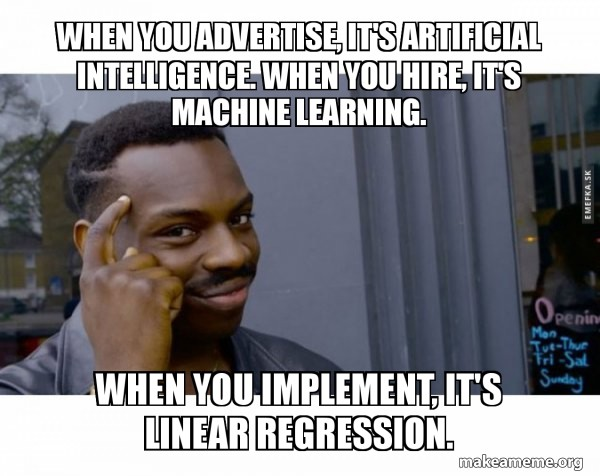

One of the simplest and most natural ways of fitting a function to data is linear least squares regression. Given $x, y$ data of the form $(x_1, y_1), \ldots, (x_n, y_n)$, linear regression finds

$\hat{w} = \arg \min_{w} \sum_{i=1}^n (w x_i - y_i)^2$.

It is easy to verify that this admits a closed form solution in our 1D case: $\hat{w} = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$ (assuming the denominator does not vanish).

In [ ]:
# 'Training' the model: a linear least squares estimate

w_hat = np.sum(np.multiply(x, y))/np.sum(np.multiply(x, x))
print(f"estimated weight = {w_hat:.4f}")

### Formatted printing in Python

You may be curious as to what the *f"..."* formatted printing notation stands for. Read up more about formatted printing in Python here: https://realpython.com/python-formatted-output/#the-python-formatted-string-literal-f-string

## Performance evaluation: How good is the predictor we learnt on an "unseen" data point?

We have estimated a linear function (i.e., its coefficient) that seems to fit the data well. How well does this estimated function perform on an unseen example $(X, Y)$ drawn from the same distribution? To understand this, we can write a function that takes as input the coefficient and evaluates it on a large block of samples drawn from the data distribution. NOTE: This is a performance evaluation operation. The learning algorithm (linear regression in our case) does not "know" the data distribution. 

In [ ]:
def evaluate(a):
    block_size = 1000
    # generate (x,y) test data from the same distribution used to simulate the learning data
    x = np.random.normal(loc=x_mean, scale=x_std, size=block_size) 
    n = np.random.normal(size=block_size)
    w = 2.0
    y = w*x + n # at this point, x and y have the same joint distribution as the data used to train the model 
    
    # apply the given predictor (a) to the generated x data 
    y_test = a*x     
    
    # compute the error between the predictions and the true y values    
    return np.dot((y_test-y), (y_test-y))/block_size # mean squared error over block_size samples

In [ ]:
test_error = evaluate(w_hat)
print(f"Prediction error of learnt model = {test_error:.4f}")

# Part 2: Linear prediction in higher dimensions

Suppose the data are of the form $(x_1, y_1), \ldots, (x_n, y_n)$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$ and $d$ is a positive integer ($d=1$ was the case we just looked at). How would you apply linear regression to learn a linear function from $\mathbb{R}^d \to \mathbb{R}$?


In [ ]:
# the 2D case (d=2)

# Generate training data

np.random.seed(2022) # setting the state of NumPy's random number to be a known value, for reproducibility
data_length = 100
x_mean = np.array([10, 10]) # 2-dimensional mean vector
x_covar = 25.0*np.eye(2) # 2x2 covariance matrix, std deviation set to be 5 per coordinate

x = np.random.multivariate_normal(x_mean, x_covar, size=data_length)
w = np.array([1, 2]) # ground truth "model"
n = np.random.normal(size=data_length, scale=1.0)

y = np.dot(x, w) + n


## Visualizing the data

Let's visualize the data in a 3D plot (x is 2D and y is 1D). Can you "rotate" the plot and see if the data is roughly close to a "plane"?

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 60) # change these angle numbers to get different views of the 3D plot

## Linear regression for $d$-dimensional data



## Exercise 2: What is the closed form solution to $\hat{w} = \arg \min_{w} \sum_{i=1}^n (w^T x_i - y_i)^2$ for the case of $d$-dimensional data? 



Write your answer here. 

The following code implements this solution. 

In [ ]:
# learning the model via d-dimensional linear regression

w_hat = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

print('learnt model: ')
print(w_hat)


In [ ]:
# evaluating the learnt model on independently generated data

def evaluate_2d(a): # NOTE: a is now assumed to be a 2D vector
    block_size = 1000
    
    # generate (x,y) test data from the same distribution used to simulate the learning data
    x_mean = np.array([10, 10]) # 2-dimensional mean vector
    x_covar = 25.0*np.eye(2) # 2x2 covariance matrix, std deviation set to be 5 per coordinate

    x = np.random.multivariate_normal(x_mean, x_covar, size=block_size)
    w = np.array([1, 2]) # ground truth "model"
    n = np.random.normal(size=block_size, scale=1.0)
    y = np.dot(x, w) + n # at this point, x and y have the same joint distribution as the data used to train the model 
    
    # apply the given predictor (a) to the generated x data 
    y_test = np.dot(x, a)   
    
    # compute the error between the predictions and the true y values    
    return np.dot((y_test-y), (y_test-y))/block_size # mean squared error over block_size samples

test_error = evaluate_2d(w_hat)
print(f"Prediction error of learnt model = {test_error:.4f}")

## Exercise 3: Learning a polynomial function in 1 dimension

Suppose you are trying to learn a __*polynomial*__ relationship between $x \in \mathbb{R}$ and $y \in \mathbb{R}$, e.g., $y = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0$ where $a_0, a_1, a_2$ represent the coefficients of a quadratic polynomial. Using your knowledge of general ($d$-dimensional) least-squares linear regression as above, in this exercise you will fit a polynomial model to given data $(x_1, y_1), \ldots, (x_n, y_n)$. 

In [ ]:
# let's load some training data first (make sure you have the data file "Week_2_Exercises_3_and_4.npy" from the Github repository downloaded in the same folder as this file)

x_train, y_train, x_test, y_test = np.load("Week_2_Exercises_3_and_4.npy", allow_pickle=True)


1) Visualization: Plot (on a single figure) all points of the form $(x, y)$ across the training and testing data. Colour the training and testing data with two separate colours. 

In [ ]:
# write code here (use multiple cells if it helps you structure your code better)

2) Fitting: Fit a polynomial of degree 2 (quadratic) to the $(x, y)$ training data. Make a new plot with the same data as in step 1 (i.e., training + testing data in 2 separate colours). Add to it a plot of the polynomial curve that you learnt in a third colour. 

In [ ]:
# write code here (use multiple cells if it helps you structure your code better)

3) Fitting: Fit a polynomial of degree 15 to the $(x, y)$ training data. Make a new plot with the same data as in step 1 (i.e., training + testing data in 2 separate colours). Add to it a plot of the polynomial curve that you learnt in a third colour. What do you conclude from this and the previous plot about the fit? 

In [ ]:
# write code here (use multiple cells if it helps you structure your code better)

## Exercise 4: The Overfitting Phenomenon

Fit polynomials of degrees ranging from 1, 2, 3, ..., 15 on the training $(x, y)$ data. For each degree, note down the root mean square error (RMSE) between the fitted polynomial's value at $x$ and the data value (i.e., $y$) across (a) all training data, and (b) all test data. 

Plot the RMSE on both the training dataset and the test dataset (as two curves with different colours) as a function of the degree of the fitted polynomial. What do you conclude is happening?  

In [ ]:
# write code here (use multiple cells if it helps you structure your code better)

## Alternative approach to learning the model: Gradient descent

Recall the d-dimensional linear least squares learning problem:

$\hat{w} = \arg \min_{w} \sum_{i=1}^n (w^T x_i - y_i)^2$,

where the training data are $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$, $i=1, \ldots, n$.

The closed form solution to this problem involves linear algebra operations such as inversion of a $d \times d$ matrix, which could be computationally expensive or unstable depending on the matrix and high dimensions $d$. Besides, we were lucky to have a closed form solution in the first place, because we were trying to fit a *linear* model. What if there is  no closed-form solution at all? 

This brings us to a workhorse of modern machine learning methods: Gradient descent. 

Letting $l(w) = \frac{1}{2n} \sum_{i=1}^n (w^T x_i - y_i)^2$ denote the net squared error of a candidate predictor $w$ (and viewing the data $x_i, y_i$ as fixed), the gradient of $l$ with respect to $w$ becomes $\nabla l(w) = \frac{1}{n} \sum_{i=1}^n (w^T x_i - y_i) x_i$. This suggests the following iterative algorithm to "descend along the gradient" and minimize $l(w)$: 

* Initialize $w \in \mathbb{R}^d$ arbitrarily, and set $\eta > 0$ (a  small "step size", say $\eta = 0.01$). 
* Repeatedly update: $ \quad w \leftarrow w - \eta \nabla l(w) = w - \eta \cdot \frac{1}{n}  \sum_{i=1}^n (w^T x_i - y_i) x_i$.


In [ ]:
# gradient descent optimization for learning the (linear) predictor

n_iterations = 100
data_dim = 2
w = np.zeros(data_dim) # initializing to the all-zeros vector 
eta = 0.001
n = len(y) 
losses = []

for t in range(n_iterations):
    curr_loss = np.dot((np.dot(x, w) - y), (np.dot(x, w) - y))/(2.0*n) 
    losses.append(curr_loss)
    curr_grad_l = np.dot(x.T, (np.dot(x, w) - y))/n    
    w = w - eta*curr_grad_l # gradient descent update
    # print state every 10 iterations
    if t % 10 == 0:  
        print(f"t={t}; w={w}; curr_loss={curr_loss}; grad_l={curr_grad_l}")


In [ ]:
# visualizing gradient descent on the loss vs. iterations

fig, ax = plt.subplots()

ax.plot(list(range(n_iterations)), losses)
ax.set_xlabel('iteration')
ax.set_ylabel('loss l(w)')


## *Stochastic* gradient descent for large datasets

Note that the gradient of the loss w.r.t. the model parameter $w$, i.e., $\nabla l(w) = \frac{1}{n} \sum_{i=1}^n (w^T x_i - y_i) x_i$, involved a sum of as many terms as there are data points ($n$). Computing this sum can be prohibitively expensive if the training set is huge, e.g., the benchmark ImageNet dataset for computer vision contains approx. $n=10^6$ datapoints (each is an image with a label). 

Stochastic gradient descent (SGD) is an approach to alleviate the difficulty of computing the *exact* gradient via a giant sum, by computing an *approximate* gradient w.r.t. w but which is unbiased in the probabilistic sense. To see this, note that if an integer $I$ is sampled uniformly at random from $\{1, 2, \ldots, n\}$, and $G$ is a random vector defined to be $G = (w^T x_I - y_I) x_I$, then the expectation of $G$ w.r.t. the random draw of $I$ is exactly $\frac{1}{n} \sum_{i=1}^n (w^T x_i - y_i) x_i = \nabla l(w)$. Hence $G$ can be regarded as a "noisy" (but unbiased) gradient estimate. 

The following code runs SGD.

In [ ]:
# Stochastic Gradient Descent (SGD) on the loss function

n_iterations = 100
w = np.zeros(data_dim) # initializing to the all-zeros vector 
eta = 0.001
n = len(y)
losses = []

for t in range(n_iterations):
    curr_loss = np.dot((np.dot(x, w) - y), (np.dot(x, w) - y))/(2.0*n) 
    losses.append(curr_loss)
    I = np.random.choice(n) # sample an integer uniformly from {0, 1, ..., n-1} 
    G = (np.inner(x[I,:], w) - y[I])*x[I,:].T
    w = w - eta*G # SGD update 
    # print state every 10 iterations
    if t % 10 == 0:  
        print(f"t={t}; w={w}; curr_loss={curr_loss}; grad_l={curr_grad_l}")
    

# test_error = np.mean([(np.dot(w_hat, x) - y)**2 for x, y in zip(x_test, y_test)])
# print(f"true weight = {w}, estimated weight = {w_hat}, avg test error = {test_error}")

## SGD training with PyTorch

### Automatic differentiation in PyTorch

In [ ]:
# example: auto diff of a linear model 
# credit: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

import torch

# Create tensors 

X = torch.tensor(1.0, requires_grad=True)
W = torch.tensor(2.0, requires_grad=True)
B = torch.tensor(3.0, requires_grad=True)

# Set up a computation graph
Y = W * X + B    # Y = 2 * X + 3
print(f"Y is equal to {Y}")

# NOTE: X, W, B and Y (uppercase names) are different from the x, w, b, and y variables you 
# have previously used in this notebook!

# Compute gradients
Y.backward()

# Print out the gradients
print(X.grad)    # X.grad = 2 
print(W.grad)    # W.grad = 1 
print(B.grad)    # B.grad = 1 

### Observe: Tensors can store "gradients" (partial derivatives). 

Note in the above example how the tensors Y, X, W, B stored their values (5, 1, 2, 3). In addition, after the backward() method of Y was called, the tensors X, W and B additionally ended up storing the partial derivatives or gradients of Y w.r.t. their values: 

$\frac{\partial Y}{\partial X} = W = 2$, 

$\frac{\partial Y}{\partial W} = X = 1$, 

$\frac{\partial Y}{\partial B} = 1$.

In PyTorch, the *backward()* method of a tensor (e.g., Y), which depends on other tensors (e.g., X, W, B) via a *computation graph*, implements automatic (partial) differentiation or the "autograd" operation, and populates the other tensors' *grad* variables with the appropriate partial derivatives. This is very powerful for more general and complex problems. 

In our example above, the computation graph that specifies how Y is derived from X, W and B through mathematical operations is the following:


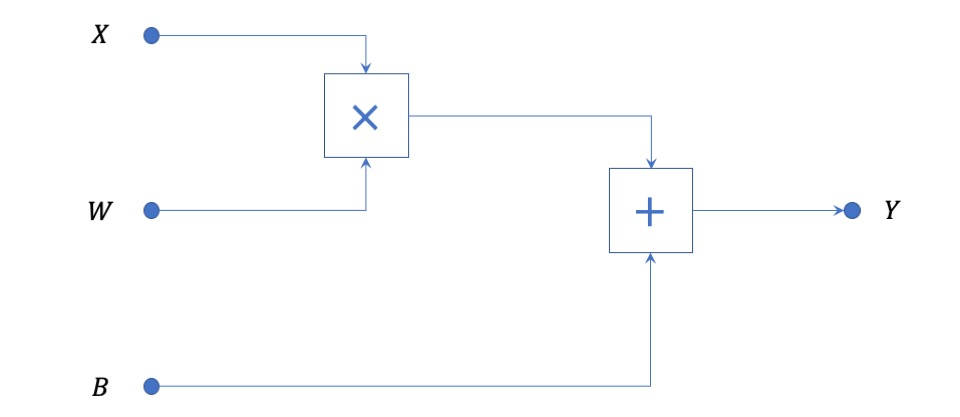
__<center>Computation graph for the variable Y</center>__




## Exercise 5

Write a function that computes (automatically via in PyTorch) the gradient of the variable $y$ with respect to the 2D vector $x$, where $y = \frac{e^{10x_1}}{e^{10x_1} + e^{10x_2}}$. The function should accept (arbitrary) input values for $x$. Demonstrate that it works. 

In [ ]:
# SGD with PyTorch on the 2D prediction problem

import torch.nn as nn

# NOTE: we'll use the same 2-D (x,y) training data that we used at the beginning of part 2 of this notebook

# first convert training data to Tensor type, as this is what PyTorch understands
# torch.from_numpy(...) converts a numpy array to a tensor, and a Tensor's .float()
# method converts its datatype to float (32 bit)

x_train_tens = torch.from_numpy(x).float()
y_train_tens = torch.from_numpy(y).float()

model = nn.Linear(data_dim, 1, bias=False)
print ('w: ', model.weight)
print(type(model))



__Explanation.__ The key line above is _model = nn.Linear(data_dim, 1, bias=False)_. This line instantiates _model_ as an object of the _torch.nn.modules.linear.Linear_ class. At a high level, think of this instance of the Linear module class of PyTorch as defining a linear transformation on a vector, i.e., output vector = matrix x input vector. The argument _data_dim_ indicates the size of the input vector and the argument _1_ the output size, thus the matrix associated with this linear transformation _(model.weight)_ must have size _1 x data_dim_. Let's check this explicitly:


In [ ]:
model.weight.shape

The computation graph for the output of _model_ vs. its input is: 
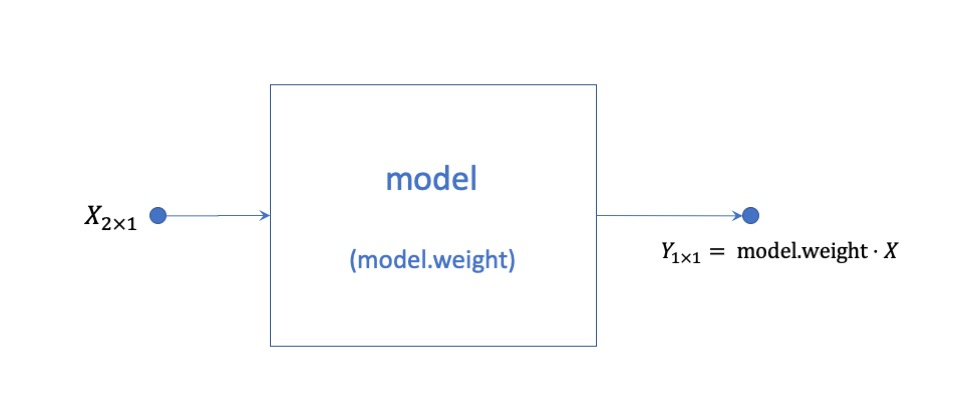

NOTE: Compared to the earlier (simpler) computational graph of Y = WX + B, here the role of W is played by the variable _model.weight_ that sits __inside__ the object _model_. 

In [ ]:
# test current predictor (i.e., model.weight)

# generate (x,y) test data from the same distribution used to simulate the learning data
block_size = 1000
x_mean = np.array([10, 10]) # 2-dimensional mean vector
x_covar = 25.0*np.eye(2) # 2x2 covariance matrix, std deviation set to be 5 per coordinate

x_test = np.random.multivariate_normal(x_mean, x_covar, size=block_size)
w_test = w # ground truth "model"
n_test = np.random.normal(size=block_size, scale=1.0)
y_test = np.dot(x_test, w_test) + n_test # at this point, x and y have the same joint distribution as the data used to train the model 
y_test_tens = torch.from_numpy(y_test).float()

# # apply the given predictor (i.e., model) to the generated x data 
y_pred_test = model.eval()(torch.from_numpy(x_test).float())

loss_fn = nn.MSELoss(reduction='mean')
loss = loss_fn(y_pred_test.squeeze(), y_test_tens)
print(f'MSE on test set: {loss.item():.4f}')




In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

n_iterations = 100
batch_size = 16
step_size = 1e-4
train_data = TensorDataset(x_train_tens, y_train_tens)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
optimizer = torch.optim.SGD(model.parameters(), lr=step_size)

losses = []

model.train()
for t in range(n_iterations):
    for x_batch, y_batch in train_loader:
        y_pred_batch = model(x_batch)
        loss = loss_fn(y_batch, y_pred_batch.squeeze())
#         print(y_batch.shape)
#         print(y_pred_batch.squeeze().shape)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
#         print(loss.item())
        losses.append(loss.item())

# print(losses)

## Resources on data loaders, batch sizes and optimizers 

https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

https://pytorch.org/docs/stable/optim.html

In [ ]:
# plot the losses encountered through the training process
# see the training loss drop over iterations

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(losses)

In [ ]:
# test current predictor (i.e., model.weight), once again, to verify if something good has been learnt

# generate (x,y) test data from the same distribution used to simulate the learning data
block_size = 1000
x_mean = np.array([10, 10]) # 2-dimensional mean vector
x_covar = 25.0*np.eye(2) # 2x2 covariance matrix, std deviation set to be 5 per coordinate

x_test = np.random.multivariate_normal(x_mean, x_covar, size=block_size)
w_test = w # ground truth "model"
n_test = np.random.normal(size=block_size, scale=1.0)
y_test = np.dot(x_test, w_test) + n_test # at this point, x and y have the same joint distribution as the data used to train the model 
y_test_tens = torch.from_numpy(y_test).float()

# # apply the given predictor (i.e., model) to the generated x data 
y_pred_test = model.eval()(torch.from_numpy(x_test).float())

loss_fn = nn.MSELoss(reduction='mean')
loss = loss_fn(y_pred_test.squeeze(), y_test_tens)
print(f'MSE on test set: {loss.item():.4f}')

## Exercise 6: The impact of batch size and learning rate. 

Repeat the PyTorch SGD learning exercise with different sizes of batch size, and learning rate. Explain your observations and conclusions. 

# Additional resources

## Resources on Autograd- can boost your understanding 

- Autograd mechanics - https://pytorch.org/docs/stable/notes/autograd.html

- A tool to visualize the computational graph : https://github.com/szagoruyko/pytorchviz  (github repository)
    
    https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

-  https://stackoverflow.com/questions/62067400/understanding-accumulated-gradients-in-pytorch  

## About Pytorch framework

- https://youtu.be/VyI1cRJi0b8 (from 7:30 to 11.03 )<br /><br/>
    An interview with Soumith Chintala  (One of the creators of Pytorch, the creator of torch) where he talks about what lead to creating PyTorch. 

